In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,r2_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("drug200.csv") 
df.head(25)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [5]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df.Sex)
df['BP']=le.fit_transform(df.BP)
df['Cholesterol']=le.fit_transform(df.Cholesterol)
df['Drug']=le.fit_transform(df.Drug)

In [6]:
df.head(25)
df['Drug'].nunique()

5

In [7]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Drug',axis=1),df.Drug,test_size=.99,random_state=42)

In [8]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [9]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [10]:
y_pred = clf.predict(x_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)

In [12]:
accuracy

0.18686868686868688

In [13]:
f1Score=f1_score(y_test, y_pred,average='weighted')

In [14]:
f1Score

0.1497978917333756

In [15]:
from sklearn import tree

[Text(0.5, 0.75, 'BP <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = drugA'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = drugA'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = drugB'),
 Text(0.625, 0.5, '  False')]

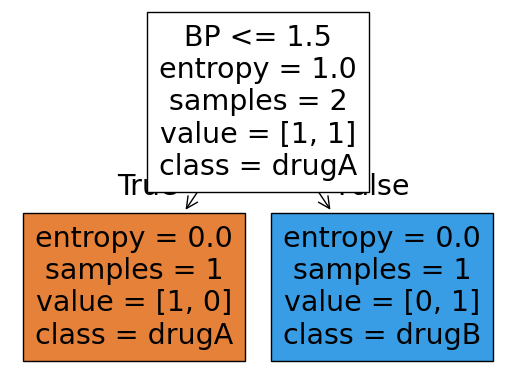

In [16]:
tree.plot_tree(clf, feature_names=['Age','Sex','BP','Cholesterol','Na_to_K'], class_names=['drugA','drugB','drugX','drugY','drugC'], filled=True)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0, 23,  0,  0],
       [ 0,  0, 16,  0,  0],
       [ 0,  0, 15,  0,  0],
       [ 0,  0, 18,  0, 36],
       [ 0,  0, 68,  0, 22]])